In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ad_vs_sales.csv')


In [4]:
df.head()


,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ad_Expense  200 non-null    float64
 1   Sales       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.isnull().sum()

Ad_Expense    0
Sales         0
dtype: int64

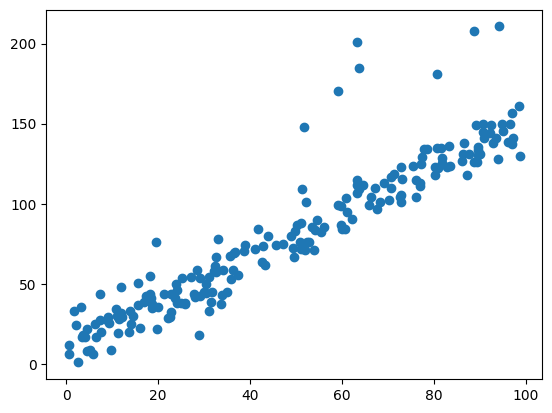

In [7]:
plt.scatter(df['Ad_Expense'], df['Sales'])

Text(0.5, 1.0, 'Ad vs sales')

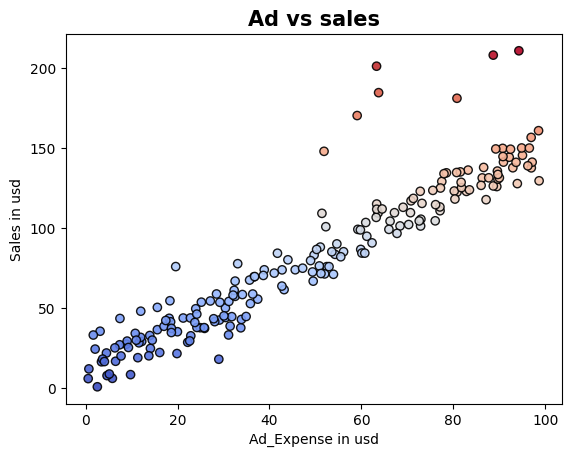

In [11]:
plt.scatter(df['Ad_Expense'],
            df['Sales'], 
            c= df['Sales'],
            cmap='coolwarm',
            alpha=.90,
            edgecolor= 'k'
           )
plt.xlabel('Ad_Expense in usd')
plt.ylabel('Sales in usd')
plt.title('Ad vs sales',fontsize= 15,weight= 'bold')

In [12]:
df.corr()

,Ad_Expense,Sales
Ad_Expense,1.000000,0.930611
Sales,0.930611,1.000000


## Hardcoded formula

In [14]:
x = df['Ad_Expense']
y = df['Sales']

dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

In [15]:
m= np.sum(dev_x * dev_y)/ np.sum (dev_x**2)

In [16]:
m

np.float64(1.4615257314414671)

In [17]:
c = np.mean(y) - (m*np.mean(x))

In [18]:
c

np.float64(10.305535377647857)

In [19]:
df.head()

,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [20]:
m*95.07 + c

np.float64(149.25278666578814)

# linear regression using sklearn

In [24]:

from sklearn.linear_model import LinearRegression


In [25]:
reg = LinearRegression()

In [27]:
reg.fit(df[['Ad_Expense']],y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
reg.coef_

array([1.46152573])

In [30]:
reg.intercept_

np.float64(10.305535377647843)

In [35]:
reg.predict([[59.87]])

C:\Users\shaha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([97.80708092])

In [37]:
reg.predict(df[['Ad_Expense']])

array([ 65.03967402, 149.25278667, 117.28921892,  97.80708092,
        33.10533679,  33.10533679,  18.79699988, 136.90289424,
        98.15784709, 113.79617242,  13.31627838, 152.05891607,
       131.96293726,  41.33372666,  36.87607318,  37.10991729,
        54.76514813,  87.00640576,  73.42883172,  52.86516468,
        99.73629488,  30.69381933,  52.99670199,  63.85583818,
        76.96572399, 125.06453581,  39.49220423,  85.45718849,
        96.88631971,  17.10163003,  99.09322356,  35.2245491 ,
        19.82006789, 148.98971203, 151.43046001, 128.45527551,
        54.82360916,  24.58464177, 110.30312592,  74.64189808,
        28.1361493 ,  82.6802896 ,  15.33318389, 143.20207014,
        48.12982131, 107.13161509,  55.86129243,  86.31948867,
        90.20714712,  37.32914615, 152.0150703 , 123.58839482,
       147.61587785, 141.08285783,  97.69015886, 145.04359256,
        23.2400381 ,  38.95143971,  16.91163168,  57.84896742,
        67.11504056,  49.95672847, 131.42217274,  62.45

In [38]:
df2 = df.copy()

In [39]:
df2['predicted'] = reg.predict(df[['Ad_Expense']])


In [40]:
df2.head()

,Ad_Expense,Sales,predicted
0,37.45,55.64,65.039674
1,95.07,145.42,149.252787
2,73.20,115.41,117.289219
3,59.87,86.67,97.807081
4,15.60,50.50,33.105337


In [41]:
df2.tail()

,Ad_Expense,Sales,predicted
195,34.92,44.81,61.342014
196,72.60,104.45,116.412303
197,89.71,133.46,141.419009
198,88.71,207.92,139.957483
199,77.99,133.94,124.289927


In [42]:
reg.score(df[['Ad_Expense']], df[['Sales']])

0.8660362663371463

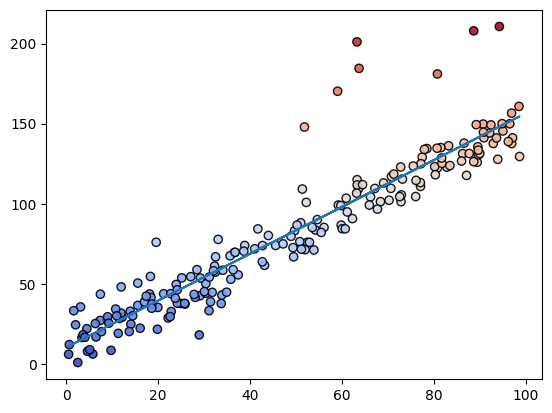

In [46]:
plt.plot(df[['Ad_Expense']],reg.predict(df[['Ad_Expense']]))
plt.scatter(df['Ad_Expense'],
            df['Sales'], 
            c= df['Sales'],
            cmap='coolwarm',
            alpha=.90,
            edgecolor= 'k'
           )

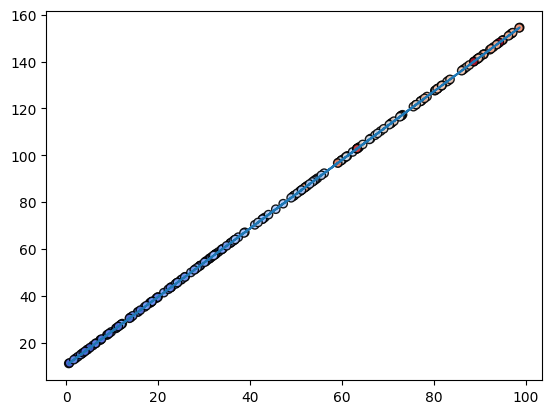

In [47]:
plt.plot(df[['Ad_Expense']],reg.predict(df[['Ad_Expense']]))
plt.scatter(df['Ad_Expense'],
            reg.predict(df[['Ad_Expense']]), 
            c= df['Sales'],
            cmap='coolwarm',
            alpha=.90,
            edgecolor= 'k'
           )

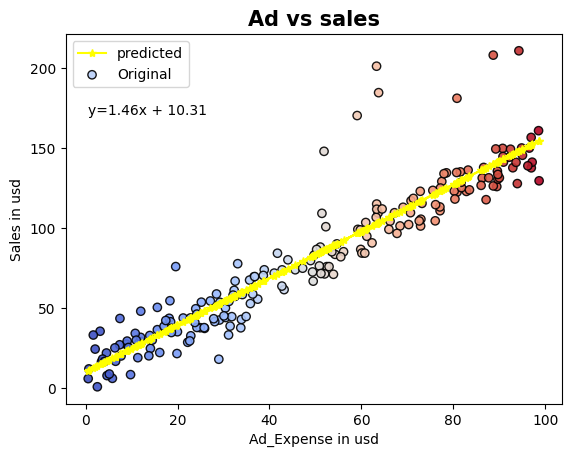

In [58]:
m= reg.coef_[0]
c= reg.intercept_
equ = f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(min(df['Ad_Expense']),max(df['Sales'])-40, equ)

plt.plot(df[['Ad_Expense']],reg.predict(df[['Ad_Expense']]), color='yellow', marker='*',label= 'predicted')
plt.scatter(df['Ad_Expense'],
            df['Sales'], 
            c= df['Ad_Expense'],
            cmap='coolwarm',
            alpha=.90,
            edgecolor= 'k',
            label = 'Original'
           )
plt.xlabel('Ad_Expense in usd')
plt.ylabel('Sales in usd')
plt.title('Ad vs sales',fontsize= 15,weight= 'bold')

plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(df[['Sales']], df2['predicted'])

285.894129853258